# Задача

Риэлтору поручено выставить объекты недвижимости площадью 48м$^2$ и 54м$^2$ на продажу.

Риэлтор пришёл к аналитику за советом «какой ценник поставить?» Аналитик занялся изучением вопроса и выяснил, 
что в этом районе объект 31м$^2$ стоит \\$19310 объект 51м$^2$ стоит \\$52150 объект 61м$^2$ стоит \\$74570 

Вопрос: что сказать риэлтору? 

## Решение:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
#import seaborn as sns

# Строим датасет из известных нам данных. Там, где данных нет (стоимость 2-х домов) - там ставим значение np.nan
data = pd.DataFrame({'areas':[31, 48, 51, 54, 61], 
                     'costs' : [19310, np.nan, 52150, np.nan, 64570]})
data1 = data.dropna() # выкидываем неполные строки - датасет с только известными значениями

data

,areas,costs
0,31,19310.0
1,48,NaN
2,51,52150.0
3,54,NaN
4,61,64570.0


In [2]:
# Полиномиальная интерполяция,
# Интерполяция производится с помощью полинома 3-его порядка
# Вычисления закидываем в дополнительный столбец
data['new_costs'] = data['costs'].interpolate(method='polynomial', order=2)
data

,areas,costs,new_costs
0,31,19310.0,19310.0
1,48,NaN,38282.5
2,51,52150.0,52150.0
3,54,NaN,60912.5
4,61,64570.0,64570.0


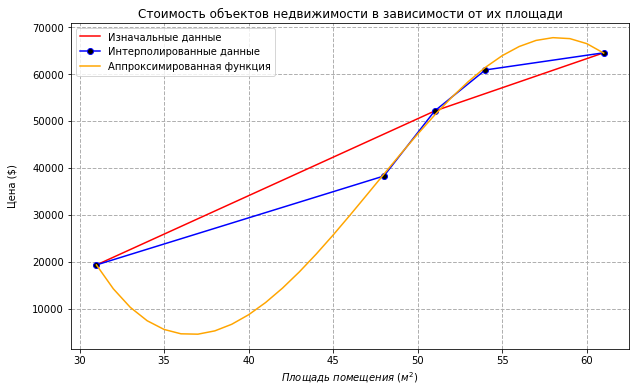

In [3]:
# Красиво все рисуем

linear_model=np.polyfit(data['areas'],data['new_costs'],3)
linear_model_fn=np.poly1d(linear_model)
x_s=np.arange(data['areas'][0],data['areas'][len(data['areas'])-1]+1)

fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(1,1,1)
ax.plot(data1['areas'],data1['costs']
         , color = 'red'
         , label = 'Изначальные данные'
       )
ax.plot(data['areas'],data['new_costs']
         , color = 'blue'
         , marker = 'o'
         , markerfacecolor = 'black'
         , label = 'Интерполированные данные'
       )
ax.plot(x_s,linear_model_fn(x_s)
        , color = 'orange'
        , label = 'Аппроксимированная функция'
       )
plt.legend(loc = 'upper left')
plt.grid(linewidth = 1, linestyle = '--')
plt.title('Стоимость объектов недвижимости в зависимости от их площади')
plt.xlabel('$Площадь\ помещения\ (м^2)$')
plt.ylabel('Цена (\\$)', labelpad=15);
plt.show()

## Ответ:

С помощью интерполяции по имеющимся данным мы смогли заполнить недостающие данные. Использовалась интерполяция 3-го порядка (в результате получилась функция вида $f(x)=ax^3+bx^2+cx+d$). С помощью этой функции мы смогли предсказать недостающие значения.

In [4]:
result = data[data.isnull().any(1)] # фильтруем только строки, где было пусто (то, что надо сосчитать)
result.drop(['costs'], axis=1) # Удаляем столбец со старыми ценами (в этих строках NaN)

,areas,new_costs
1,48,38282.5
3,54,60912.5
